In [8]:
# import all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
movies = pd.read_csv('Movie-Ratings.csv') # impoorting the data into a pandas dataframe

### Let's explore the dataset and learn more about the data

In [10]:
movies.head() # returns the top n rows, where n is by default 5 

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [11]:
movies.shape # return a tuple with (number of rows, number of columns) 

(559, 6)

In [12]:
# Changing the column names for ease of typing while doing analysis

movies.columns = ['Film','Genre','CriticRating','AudienceRating','BudgetMillion','YearOfRelease']

###  *'YearOfRelease'  column is 'int' which is correct but think again, do we really need year column as ini, are we going to perform statistics on this column, obviously NO, so we need to convert the datatype of few columns*

In [13]:
movies.dtypes # to check upon the data types of each col

Film              object
Genre             object
CriticRating       int64
AudienceRating     int64
BudgetMillion      int64
YearOfRelease      int64
dtype: object

In [14]:
# We are now converting the datatypes of Genre, YearOfRelease, Film into category
movies.Genre = movies.Genre.astype('category')
movies.YearOfRelease = movies.YearOfRelease.astype('category')
movies.Film = movies.Film.astype('category')

In [15]:
movies.info() # This function as the name tells gives all the necessary info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillion   559 non-null    int64   
 5   YearOfRelease   559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [16]:
# This gives summery stats on the numeric columns like mean, max, standard deviation etc.
movies.describe()

,CriticRating,AudienceRating,BudgetMillion
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


### Joint Plot ( Using KDE, Scatter, histogram)

##### _one key takeaway is that as the audience rating increase critic rating also tend to increase but as we go up they somewhat seems equal_

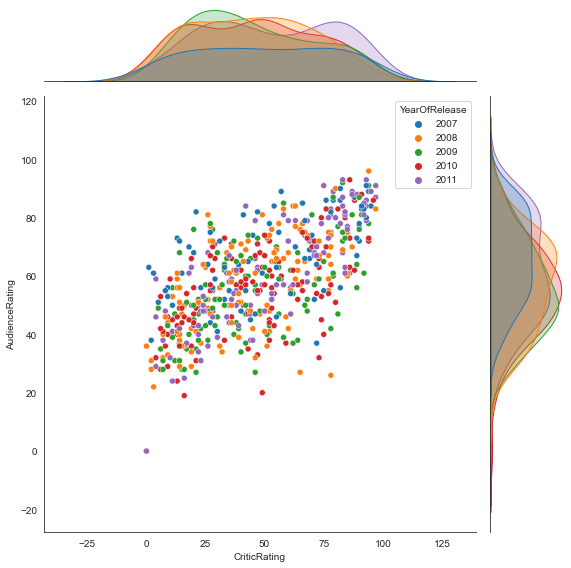

In [51]:
# jointplot will show the distribution of two variables as well as the corelation between the two variables
f = sns.jointplot(data = movies,x='CriticRating',y='AudienceRating',kind='scatter',hue='YearOfRelease',height=8)

### -- It seems that AudienceRating is normaly distributed and Critic Rating is somewhat uniform

### -- We can see that the desity is more  between  19 to 41 on x-axis 

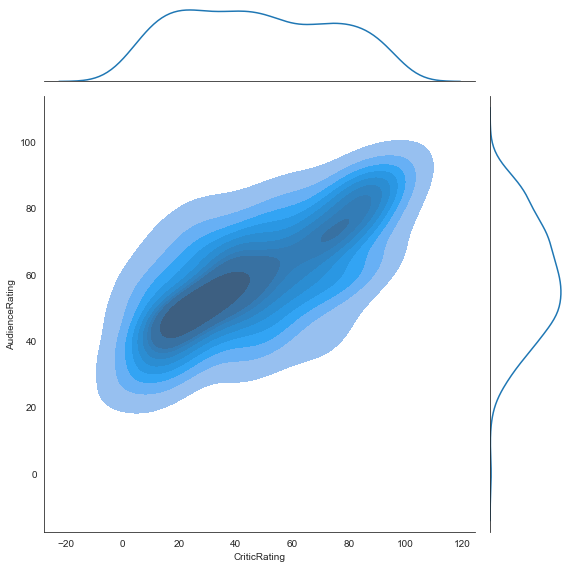

In [53]:
sns.jointplot(data = movies,x='CriticRating',y='AudienceRating',kind='kde',joint_kws = {'shade':True},height=8)

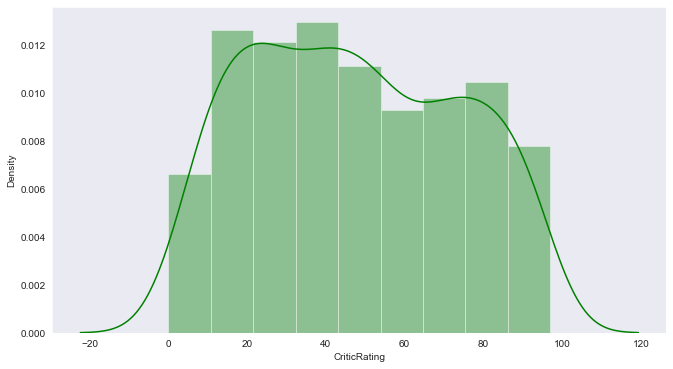

In [19]:
plt.figure(figsize = (11,6))
sns.set_style('dark')
f = sns.distplot(movies.CriticRating, color='green')
plt.show()

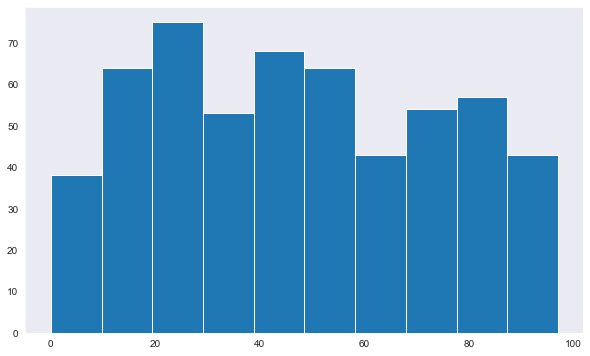

In [20]:
plt.figure(figsize = (10,6))
h = plt.hist(movies.CriticRating)

<Figure size 1080x720 with 0 Axes>

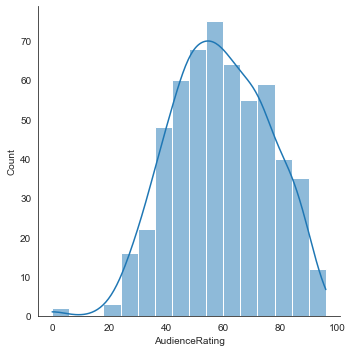

In [54]:
# This graph is showing the count on y-axis
plt.figure(figsize = (15,10))
f = sns.displot(movies.AudienceRating,kde=True) 

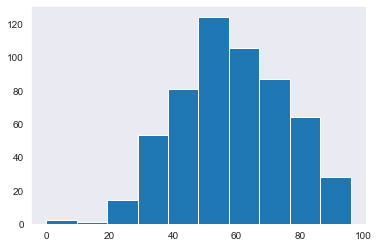

In [22]:
h = plt.hist(movies.AudienceRating,rwidth=1)

-------

## Now we will plot Budgets for different Genre with a stacked  histogram 

#### -- Most of the movies have budget less then or around   $50 million and the biggest share in those movies is occupied by Comedy and Drama Genre  

#### -- action genre tend to have highest budget movies

In [23]:
list1 = list()
labels = list()
for gen in movies.Genre.cat.categories:
    list1.append(movies[movies['Genre'] == gen]['BudgetMillion'])
    labels.append(gen)

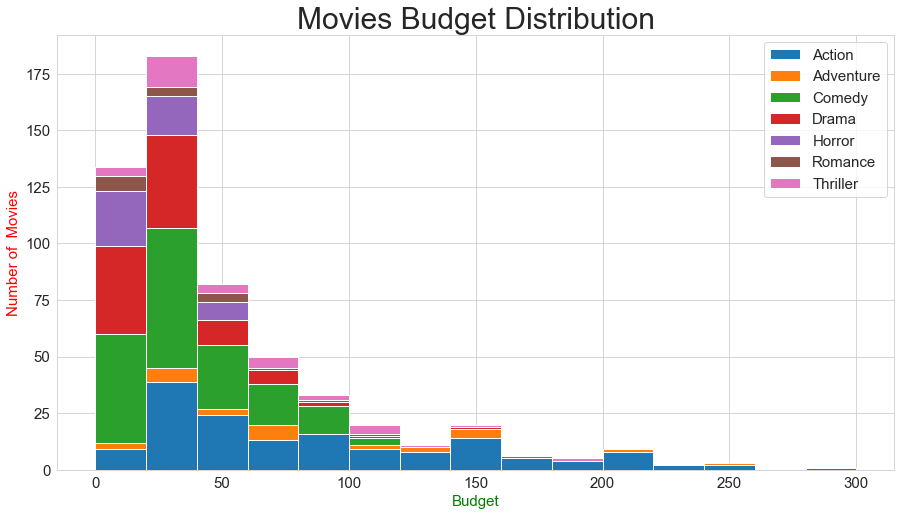

In [24]:
sns.set_style('whitegrid')
# plt.figure(figsize = (10,7))
fig , ax = plt.subplots(figsize=(15,8))
plt.hist(list1,stacked=True,bins=15,label=labels)
plt.title('Movies Budget Distribution',fontsize=30)
plt.ylabel('Number of  Movies',fontsize=15,color='Red')
plt.xlabel('Budget',fontsize=15,color='Green')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(prop={'size':15})
plt.show()

## List of seaborn color palletes (for KDE plot)

In [25]:
# These are the different palletes that can be used in KDE (Kernel density plot)
pallete = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

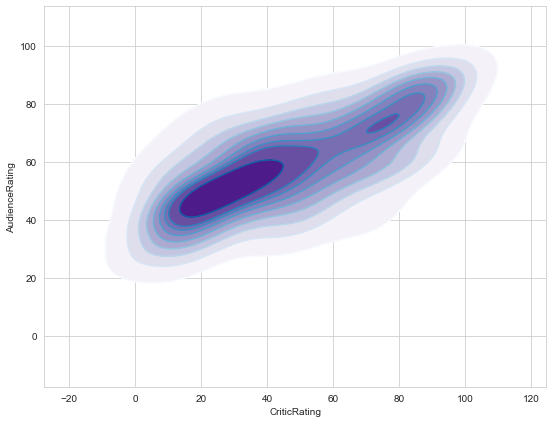

In [26]:
plt.figure(figsize = (9,7))
k1 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,cmap='Purples',shade=True,shade_lowest=False)
k1 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,cmap='Blues')

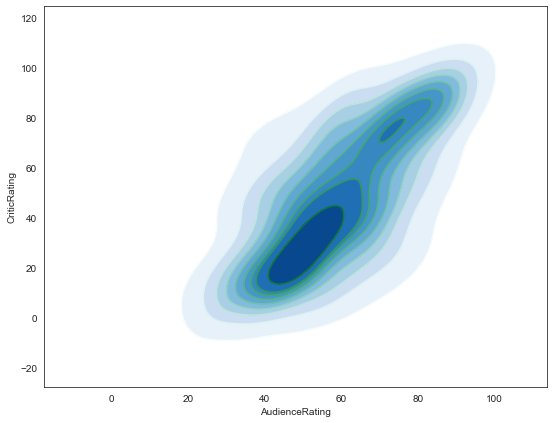

In [55]:
plt.figure(figsize = (9,7))
k2 = sns.kdeplot(movies.AudienceRating,movies.CriticRating,cmap='Blues',shade=True,shade_lowest=False)
k2 = sns.kdeplot(movies.AudienceRating,movies.CriticRating,cmap='BuGn')

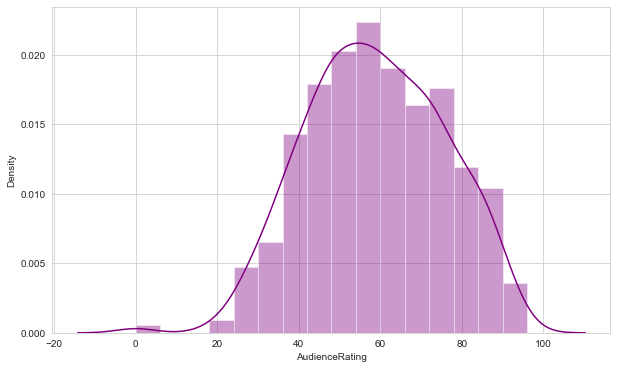

In [28]:
# This graph is showing the density on y-axis
fig , axes = plt.subplots(figsize = (10,6))
h = sns.distplot(movies.AudienceRating,color='purple')

[(-20.0, 120.0)]

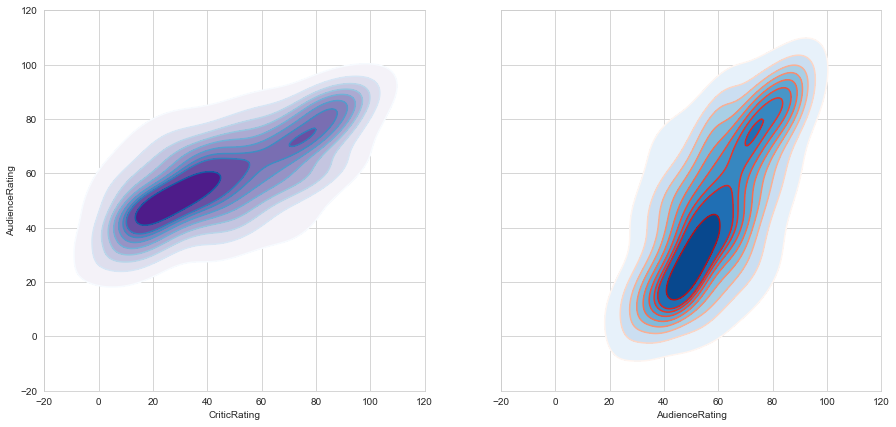

In [29]:
fig , axes = plt.subplots(nrows=1,ncols=2,figsize=(15,7),sharex=True,sharey=True)
k1 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,cmap='Purples',shade=True,shade_lowest=False,ax=axes[0])
k1 = sns.kdeplot(movies.CriticRating,movies.AudienceRating,cmap='Blues',ax=axes[0])

k2 = sns.kdeplot(movies.AudienceRating,movies.CriticRating,cmap='Blues',shade=True,shade_lowest=False,ax=axes[1])
k2 = sns.kdeplot(movies.AudienceRating,movies.CriticRating,cmap='Reds',ax=axes[1])

k1.set(xlim=(-20,120))
k1.set(ylim=(-20,120))

#### --To explain this chart suppose if we are to produce any movie and assume we are an average director then according to the chart we should probably go for a Thriller genre or for Drama and not for horror because we are more likely in the later case to be rated below 20 by critics and if we produce a thriller movies we are more likely to be around 60 

<AxesSubplot:xlabel='Genre', ylabel='CriticRating'>

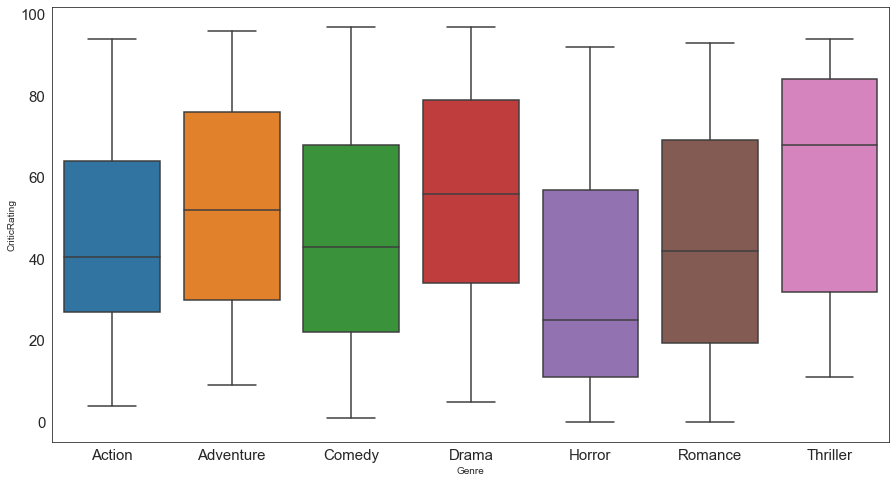

In [58]:
plt.figure(figsize=(15,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.boxplot(movies['Genre'],movies['CriticRating'])

<AxesSubplot:xlabel='Genre', ylabel='CriticRating'>

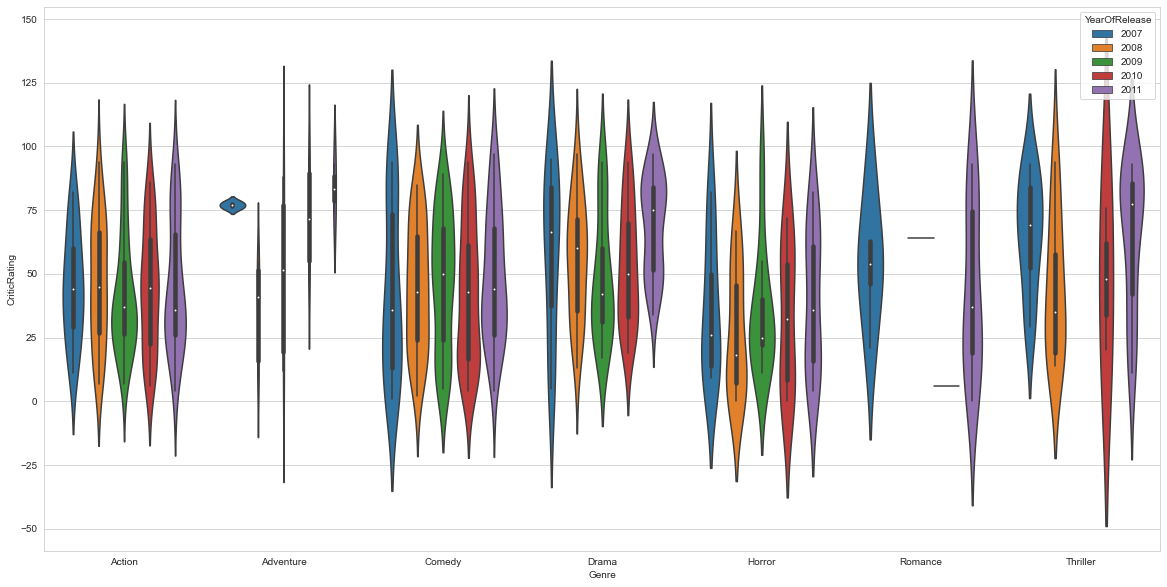

In [31]:
plt.figure(figsize= (20,10))
sns.violinplot(movies.Genre,movies.CriticRating,hue=movies['YearOfRelease'])

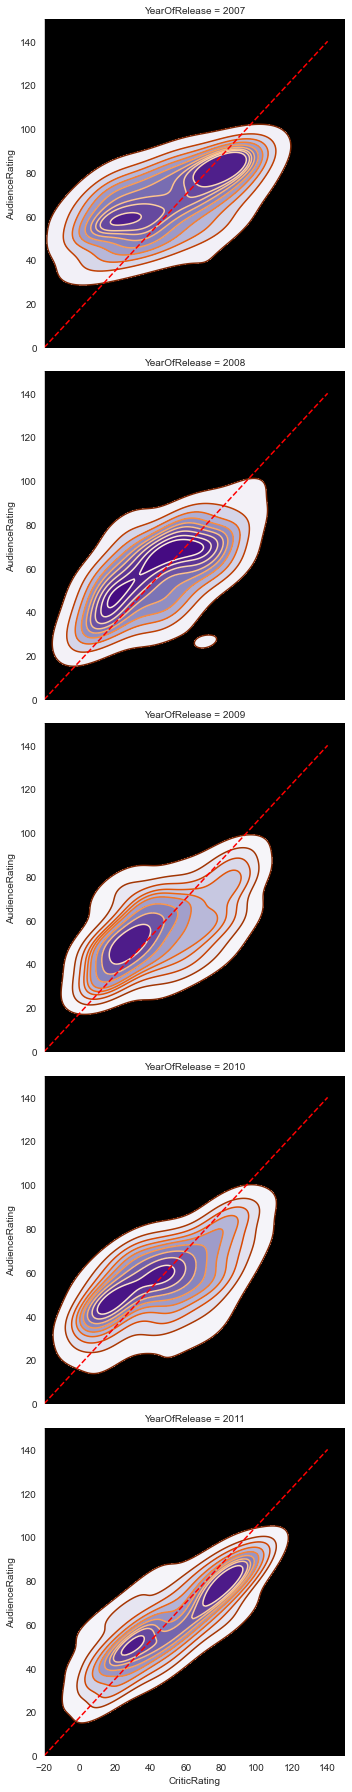

In [32]:
sns.set_style('dark',{'axes.facecolor':'black'})
g = sns.FacetGrid(movies,row='YearOfRelease',size=5)
kws=dict(shade=True,shade_lowest=False,cmap='Purples')
kws2 = dict(cmap=f'{pallete[23]}')
g = g.map(sns.kdeplot,'CriticRating','AudienceRating',**kws)
g = g.map(sns.kdeplot,'CriticRating','AudienceRating',**kws2)
g.set(xlim=(-20,150),ylim=(0,150))

for ax in g.axes.flat:
    ax.plot((-20,140),(0,140),ls='--',c='red')
plt.show()